In [2]:
library(tidyverse)
library(data.table)
library(cowplot)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose



Attac

In [3]:
path_to_master_file <- 'sample_stats_22.08.2025_finalMS.tsv'

In [4]:
per_sample_stats_df <-
fread(path_to_master_file)

In [7]:
# one sample has relative chromosome X coverage above 6. 
# this sample results from chromosome Y capture sequencing and is excluded from the plot below
per_sample_stats_df %>%
filter(rel_cov_chrX >= 2) %>%
select(ID, rel_cov_chrX)

ID,rel_cov_chrX
<chr>,<dbl>
SAMEA80831668,6.843


In [8]:
sex_hist <- per_sample_stats_df %>%
filter(ID != "SAMEA80831668") %>%
mutate(sex = factor(sex, c('Unknown', 'F', 'M'))) %>%

ggplot()+
geom_histogram(aes(x = rel_cov_chrX, fill = sex), binwidth = 0.01)+
scale_fill_manual(values = c('darkgrey', 'darkorange', '#1e81b0'))+
xlab('ChrX relative coverage')+
geom_vline(xintercept = 0.75, linetype = 'dashed')+
ylab('N')+
theme_bw() + 
theme(
    text = element_text(size = 16)
)

Warning message:
“Removed 95 rows containing non-finite outside the scale range (`stat_bin()`).”


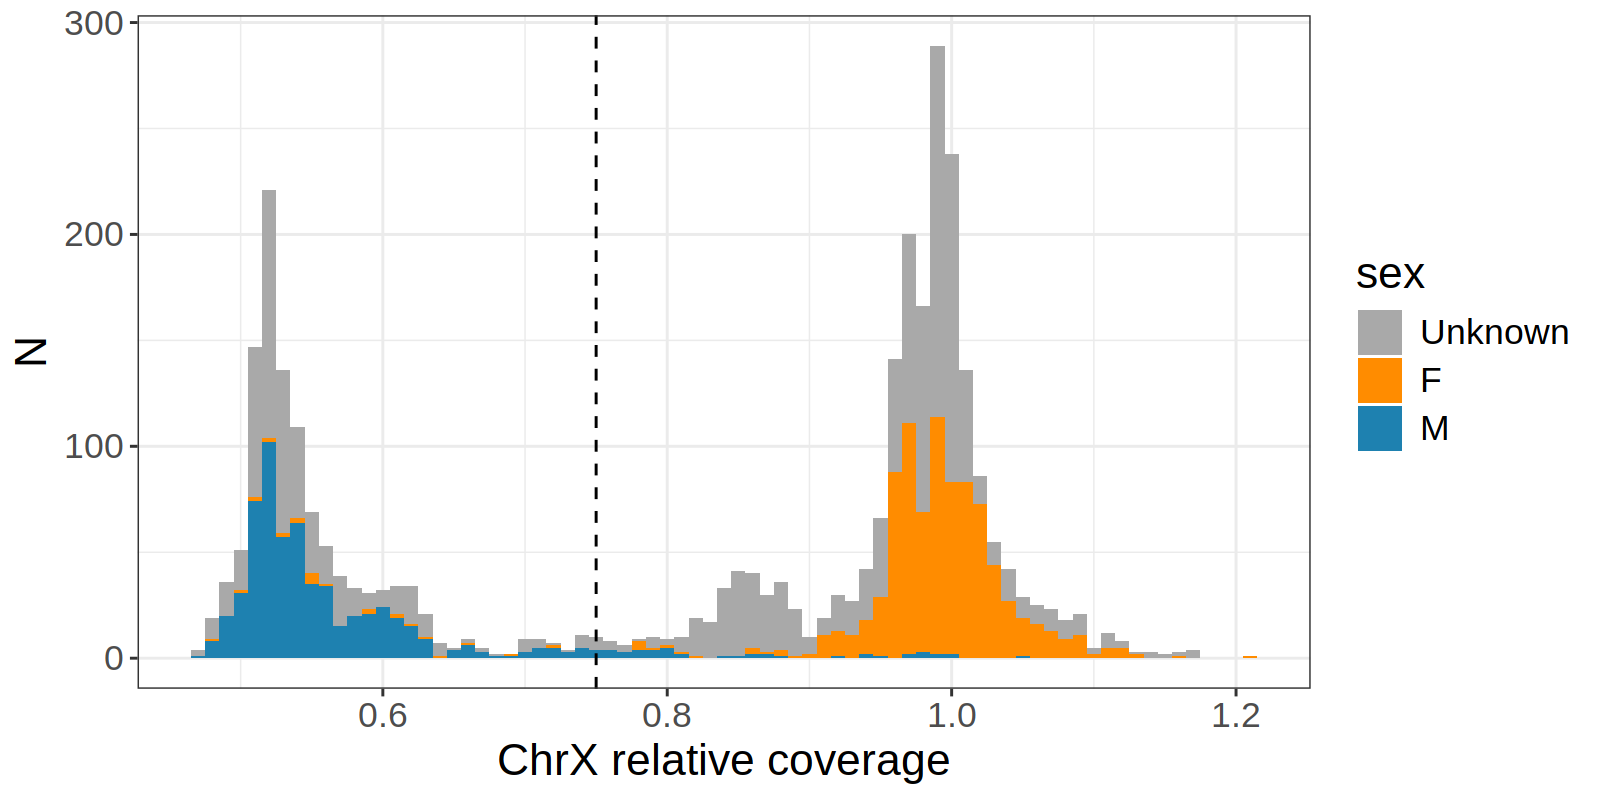

In [9]:
options(repr.plot.width = 8, repr.plot.height = 4, repr.plot.res = 200)
sex_hist

In [14]:
# 95 samples have no value for rel_cov_chrX as there is no contig annotated as chrX-derived
per_sample_stats_df %>%
filter(is.na(rel_cov_chrX)) %>%
head()

ID,ID_PGDP,species_full,group,family,genus,species,subspecies,reference,genotyping_species,⋯,gSEX,het_chrA,het_chrX,rel_chrX_het,hom_alt_chrA,hom_alt_chrX,hem_alt_chrX,rel_chrX_hom_alt,mis_chrA,mis_chrX
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PD_0116,PD_0116,Callimico_goeldii_ssp,PLA,Callitrichidae,Callimico,goeldii,ssp,Callimico_goeldii_ssp,Callimico_goeldii_ssp,⋯,NA,0.001044,NA,NA,0.000443,NA,NA,NA,0.000079,NA
SAMN21582229,SAMN21582229,Callimico_goeldii_ssp,PLA,Callitrichidae,Callimico,goeldii,ssp,Callimico_goeldii_ssp,Callimico_goeldii_ssp,⋯,NA,0.000948,NA,NA,0.000000,NA,NA,NA,0.000035,NA
PD_0629,PD_0629,Carlito_syrichta_ssp,TAR,Tarsiidae,Carlito,syrichta,ssp,Cephalopachus_bancanus_ssp,Carlito_syrichta_ssp,⋯,NA,0.001654,NA,NA,0.024835,NA,NA,NA,0.000370,NA
PD_0628,PD_0628,Cephalopachus_bancanus_ssp,TAR,Tarsiidae,Cephalopachus,bancanus,ssp,Cephalopachus_bancanus_ssp,Cephalopachus_bancanus_ssp,⋯,NA,0.002438,NA,NA,0.000004,NA,NA,NA,0.000062,NA
PD_0403,PD_0403,Tarsius_dentatus_ssp,TAR,Tarsiidae,Tarsius,dentatus,ssp,Cephalopachus_bancanus_ssp,Tarsius_dentatus_ssp,⋯,NA,0.002684,NA,NA,0.043146,NA,NA,NA,0.000763,NA
PD_0404,PD_0404,Tarsius_lariang_ssp,TAR,Tarsiidae,Tarsius,lariang,ssp,Cephalopachus_bancanus_ssp,Tarsius_lariang_ssp,⋯,NA,0.002381,NA,NA,0.042824,NA,NA,NA,0.000938,NA


In [11]:
families <- c('Hominidae', 'Hylobatidae', 'Cercopithecidae', 
              'Callitrichidae', 'Aotidae', 'Cebidae', 'Atelidae', 'Pitheciidae',
             'Tarsiidae',
             'Lemuridae','Indriidae', 'Cheirogaleidae','Lepilemuridae', 'Daubentoniidae', 'Lorisidae', 'Galagidae')

In [12]:
genera <- per_sample_stats_df %>%
mutate(family = factor(family, families)) %>%
arrange(family, genus) %>%
select(genus) %>%
distinct() %>%
unlist() %>%
as.vector()

In [13]:
sex_scatterplot <- 
per_sample_stats_df %>%
mutate(genus = factor(genus, genera)) %>%
arrange(genus) %>%
filter(ID != "SAMEA80831668") %>%
mutate(sex = factor(sex, c('Unknown', 'F', 'M'))) %>%

ggplot()+
geom_hline(yintercept = 0.75, linetype = 'dashed')+
geom_point(aes(x = genus, y = rel_cov_chrX, color = sex, shape = sex), alpha = 0.3, size = 3, stroke = 1)+
scale_color_manual(values = c('darkgrey', 'darkorange', '#1e81b0'))+
scale_shape_manual(values = c(4, 21, 22))+
ylab('ChrX relative coverage')+
xlab('Genus')+


theme_bw() + 
theme(
    text = element_text(size = 16),
    axis.text.x = element_text(angle=90, vjust=.5, hjust=1)
)

Warning message:
“Removed 95 rows containing missing values or values outside the scale range (`geom_point()`).”


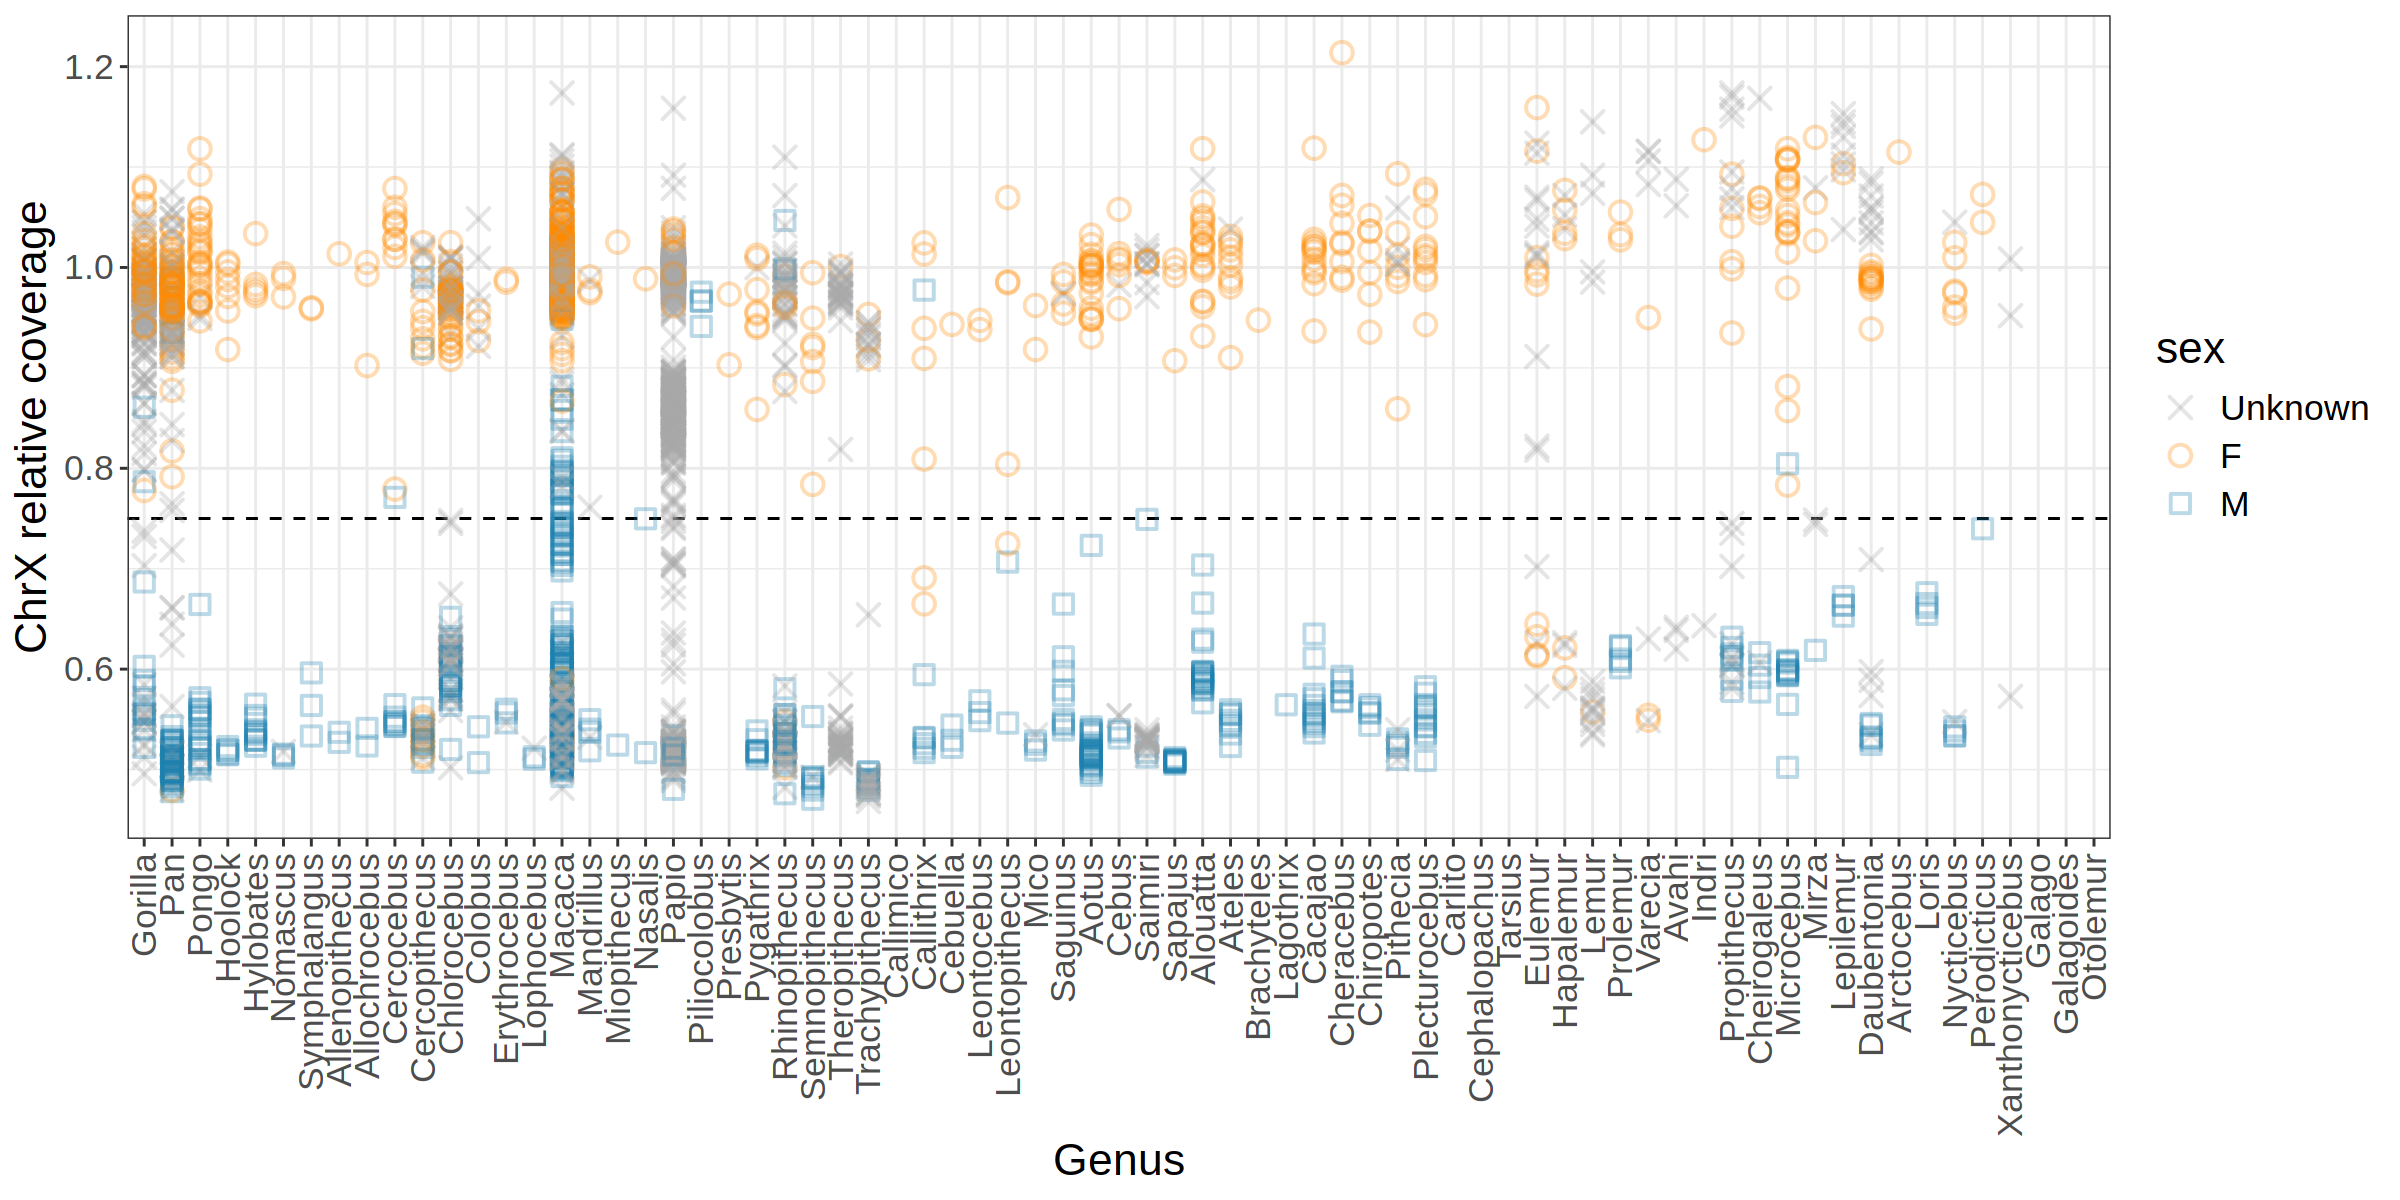

In [17]:
options(repr.plot.width = 12, repr.plot.height = 6, repr.plot.res = 200)
sex_scatterplot

Warning message:
“Removed 95 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 95 rows containing missing values or values outside the scale range (`geom_point()`).”


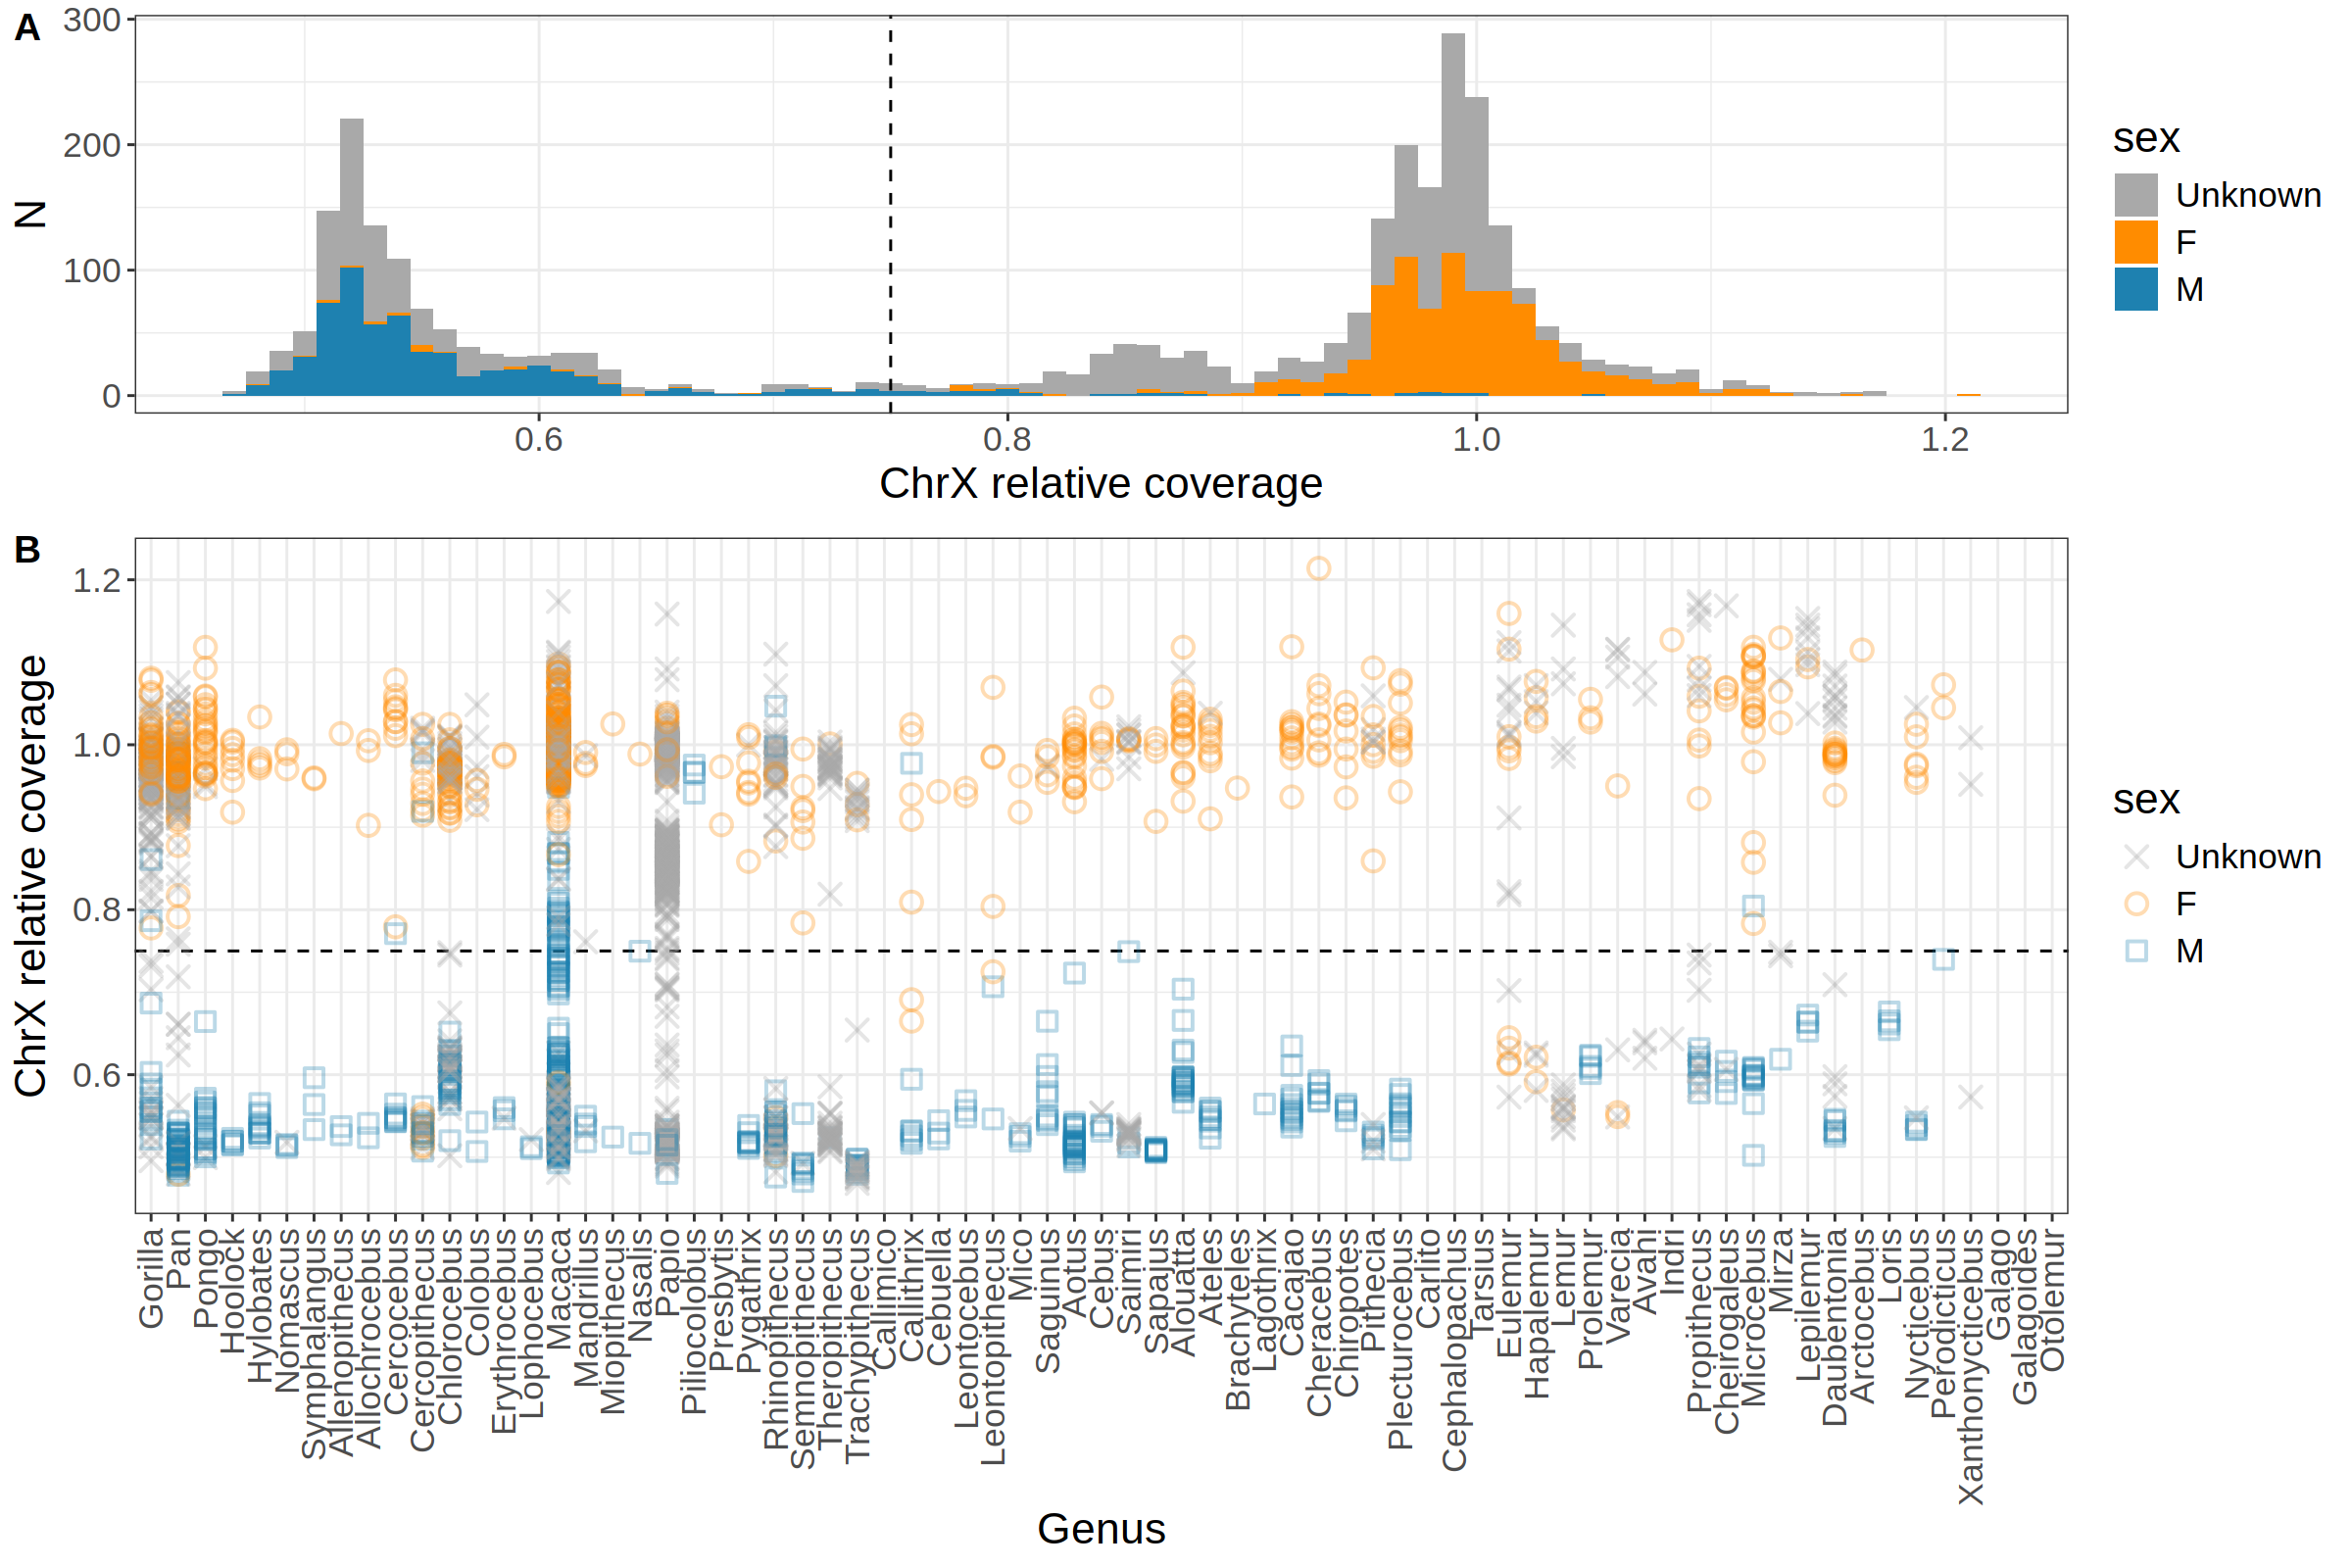

In [18]:
options(repr.plot.width = 12, repr.plot.height = 8, repr.plot.res = 200)

plot_grid(sex_hist, sex_scatterplot, nrow = 2, rel_heights = c(1, 2), align = 'v', labels = c('A', 'B'))

In [19]:
pdf('genetic_sexing.pdf', width = 12, height = 8)
plot_grid(sex_hist, sex_scatterplot, nrow = 2, rel_heights = c(1, 2), align = 'v', labels = c('A', 'B'))
dev.off()

Warning message:
“Removed 95 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 95 rows containing missing values or values outside the scale range (`geom_point()`).”


pdf 
  2